# **DL Lab 3**
## **Name: Soumyadeep Ganguly**
## **Reg No: 24MDT0082**


In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## **Question 1**

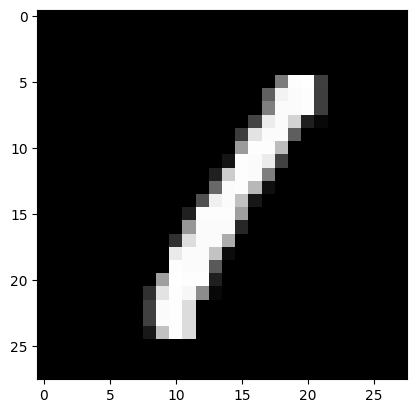

In [2]:
batch_size = 128
num_classes = 10
epochs = 10
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.imshow(X_train[3], cmap="grey")
plt.show()

### Reshape and 1-hot encoding


In [3]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train_cat = keras.utils.to_categorical(y_train, num_classes=10)
y_test_cat = keras.utils.to_categorical(y_test, num_classes=10)


In [7]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid')) 
model.add(Dense(10, activation = 'softmax'))
model.summary()

e:\VIT Study Materials\SEM 3\Deep Learning\LAB\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
sgd1 = SGD(learning_rate = 0.01)
model.compile(loss='CategoricalCrossentropy', optimizer=sgd1, metrics=['accuracy'])
hist = model.fit(X_train, y_train_cat, batch_size=128, epochs=100,verbose=1, validation_data=(X_test, y_test_cat))

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1343 - loss: 2.3042 - val_accuracy: 0.2761 - val_loss: 2.2495
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2920 - loss: 2.2349 - val_accuracy: 0.5725 - val_loss: 2.1704
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5142 - loss: 2.1441 - val_accuracy: 0.5583 - val_loss: 2.0145
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5808 - loss: 1.9627 - val_accuracy: 0.6254 - val_loss: 1.7370
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6428 - loss: 1.6676 - val_accuracy: 0.7003 - val_loss: 1.4154
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7031 - loss: 1.3550 - val_accuracy: 0.7590 - val_loss: 1.1571
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7510 - loss: 1.1220 - val_accuracy: 0.7783 - val_loss: 0.9718
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7801 - loss: 0.9485 - val_accu

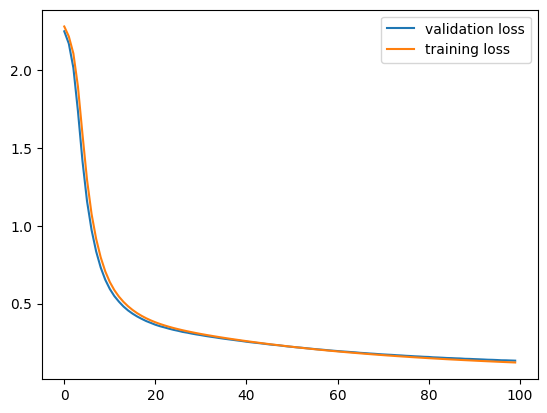

In [9]:
plt.plot(hist.history['val_loss'], label=('validation loss'))
plt.plot(hist.history['loss'], label=('training loss'))
plt.legend()
plt.show()

### Scores

In [10]:
score = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Loss: {score[0]}")
print(f"Accuracy: {score[1]}")

Loss: 0.13269127905368805
Accuracy: 0.9609000086784363


In [11]:
predictions = model.predict(X_test)
for i in range(5):
    predicted_class = np.argmax(predictions[i])
    true_class = np.argmax(y_test_cat[i])
    print(f"Image {i+1}: Predicted = {predicted_class}, True = {true_class}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Image 1: Predicted = 7, True = 7
Image 2: Predicted = 2, True = 2
Image 3: Predicted = 1, True = 1
Image 4: Predicted = 0, True = 0
Image 5: Predicted = 4, True = 4


## **Question 2: Regularization Techniques**

In [12]:
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

In [13]:
model2 = Sequential()
model2.add(Dense(512, activation="relu", input_shape=(784,)))
model2.add(Dense(256, activation="sigmoid"))
model2.add(Dropout(0.3)) 
model2.add(Dense(128, activation="sigmoid"))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation="softmax"))
model2.summary()


e:\VIT Study Materials\SEM 3\Deep Learning\LAB\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
X_subtrain, X_valid, y_subtrain, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=1)
y_subtrain_cat = keras.utils.to_categorical(y_subtrain, num_classes=10)
y_valid_cat = keras.utils.to_categorical(y_valid, num_classes=10)


In [15]:
estop = EarlyStopping(monitor = 'val_loss', min_delta = 1e-5, mode= 'min', patience=4, verbose = 1, restore_best_weights=True)

In [16]:
sgd2 = SGD(learning_rate = 0.01)

In [17]:
model2.compile(loss='CategoricalCrossentropy', optimizer=sgd2, metrics=['accuracy'])
hist2 = model2.fit(X_subtrain, y_subtrain_cat, batch_size = 128, epochs=100, verbose = 1, validation_data = (X_valid, y_valid_cat), callbacks=[estop])

Epoch 1/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1044 - loss: 2.3731 - val_accuracy: 0.1617 - val_loss: 2.2686
Epoch 2/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1262 - loss: 2.3144 - val_accuracy: 0.3182 - val_loss: 2.2297
Epoch 3/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1567 - loss: 2.2651 - val_accuracy: 0.4385 - val_loss: 2.1708
Epoch 4/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2136 - loss: 2.1967 - val_accuracy: 0.5428 - val_loss: 2.0657
Epoch 5/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3058 - loss: 2.0741 - val_accuracy: 0.6155 - val_loss: 1.8825
Epoch 6/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3962 - loss: 1.8864 - val_accuracy: 0.6307 - val_loss: 1.6371
Epoch 7/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4620 - loss: 1.6589 - val_accuracy: 0.6865 - val_loss: 1.4110
Epoch 8/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5317 - loss: 1.4500 - val_accu

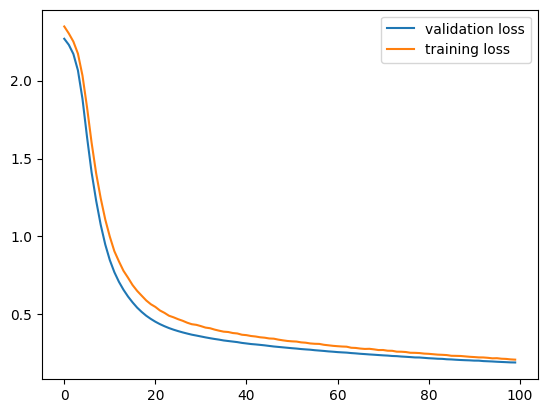

In [18]:
plt.plot(hist2.history['val_loss'], label=('validation loss'))
plt.plot(hist2.history['loss'], label=('training loss'))
plt.legend()
plt.show()

In [19]:
score = model2.evaluate(X_test, y_test_cat, verbose=0)
print(f"Loss: {score[0]}")
print(f"Accuracy: {score[1]}")


Loss: 0.17449715733528137
Accuracy: 0.9462000131607056


In [20]:
predictions = model2.predict(X_test)
for i in range(5):
    predicted_class = np.argmax(predictions[i]) 
    true_class = np.argmax(y_test_cat[i])
    print(f"Image {i+1}: Predicted = {predicted_class}, True = {true_class}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Image 1: Predicted = 7, True = 7
Image 2: Predicted = 2, True = 2
Image 3: Predicted = 1, True = 1
Image 4: Predicted = 0, True = 0
Image 5: Predicted = 4, True = 4


## **Challenging Question**

In [57]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.bias_output = np.zeros((1, output_size))
        
    def forwardpass(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)

        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = sigmoid(self.final_input)
        
        return self.output

    def backwardpass(self, X, y, output, learning_rate):
        error = y - output
        d_output = error * sigmoid_derivative(output)

        error_hidden = d_output.dot(self.weights_hidden_output.T)
        d_hidden = error_hidden * sigmoid_derivative(self.hidden_output)

        self.weights_hidden_output += self.hidden_output.T.dot(d_output) * learning_rate
        self.bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate

        self.weights_input_hidden += X.T.dot(d_hidden) * learning_rate
        self.bias_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.forwardpass(X)
            self.backwardpass(X, y, output, learning_rate)

            if epoch % 1000 == 0:
                loss = np.mean(0.5 * (y - output) ** 2)
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

In [59]:
X = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

In [60]:
nn = NeuralNetwork(input_size=3, hidden_size=4, output_size=1)

In [61]:
nn.train(X, y, epochs=10000, learning_rate=0.1)

Epoch 0, Loss: 0.1493
Epoch 1000, Loss: 0.0863
Epoch 2000, Loss: 0.0206
Epoch 3000, Loss: 0.0070
Epoch 4000, Loss: 0.0037
Epoch 5000, Loss: 0.0024
Epoch 6000, Loss: 0.0018
Epoch 7000, Loss: 0.0014
Epoch 8000, Loss: 0.0011
Epoch 9000, Loss: 0.0009


In [62]:
print("\nFinal predictions:")
print(nn.forwardpass(X))


Final predictions:
[[0.03430752]
 [0.94794497]
 [0.97425978]
 [0.04423091]]


In [63]:
classified_output = (nn.forwardpass(X) > 0.5).astype(int)
print("\nClassified Output after training (0 or 1):")
print(classified_output)



Classified Output after training (0 or 1):
[[0]
 [1]
 [1]
 [0]]
